# Doctor consultation fee project

The project aims to build a model to predict the consultation fees of a doctor by checking the previous records.

This helps us to evaluate a doctors consultation fee in case of any emergency, by checking features like -

- Qualification: Qualification and degrees held by the doctor
- Experience: Experience of the doctor in number of years
- Rating: Rating given by patients
- Profile: Type of the doctor
- Miscellaneous_Info: Extra information about the doctor
- Place: Area and the city where the doctor is located.

In [2184]:
#Importing the necessary libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2185]:
data = pd.read_excel('Final_Train.xlsx', sheet_name='Sheet1')

In [2186]:
data

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250
...,...,...,...,...,...,...,...
5956,"MBBS, MS - ENT",19 years experience,98%,"Basavanagudi, Bangalore",ENT Specialist,"98% 45 Feedback Basavanagudi, Bangalore",300
5957,MBBS,33 years experience,NaN,"Nungambakkam, Chennai",General Medicine,NaN,100
5958,MBBS,41 years experience,97%,"Greater Kailash Part 2, Delhi",General Medicine,"97% 11 Feedback Greater Kailash Part 2, Delhi",600
5959,"MBBS, MD - General Medicine",15 years experience,90%,"Vileparle West, Mumbai",General Medicine,General Medical Consultation Viral Fever Treat...,100


Observation -

Our data consists of 5961 rows and 7 columns. Fees is our target variable.

We will be using regression models in this problem.

# Exploratory data analysis

Beginning with the Exploratory data analysis.

In [2187]:
data.sample(10)

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
4875,"MBBS, MD - Dermatology, Diploma in Dermatology",19 years experience,93%,"Banjara Hills, Hyderabad",Dermatologists,"93% 39 Feedback Banjara Hills, Hyderabad",600
2842,BAMS,6 years experience,NaN,"Kalkaji, Delhi",Ayurveda,"5 Feedback Kalkaji, Delhi ₹200",200
1835,"BHMS, PGCR",27 years experience,NaN,"Malakpet, Hyderabad",Homeopath,NaN,500
772,"MBBS, FRCP - Endocrinology, MRCP (UK)",20 years experience,NaN,"Greams Road, Chennai",General Medicine,NaN,800
2228,"BDS, MDS - Prosthodontics, International Certi...",17 years experience,100%,"Pitampura, Delhi",Dentist,Impaction / Impacted Tooth Extraction Cosmetic...,200
5223,"MBBS, MD - Dermatology , Venereology & Leprosy",39 years experience,100%,"Peddar Road, Mumbai",Dermatologists,"100% 13 Feedback Peddar Road, Mumbai",100
4340,BAMS,19 years experience,NaN,"KR Puram, Bangalore",Ayurveda,NaN,50
1161,BAMS,6 years experience,96%,"Nagarbhavi, Bangalore",Ayurveda,Pizhichil Panchakarma Ayurvedic Surgery,200
1178,"MBBS, DLO, DNB - Otorhinolaryngology",21 years experience,94%,"Miyapur, Hyderabad",ENT Specialist,"94% 44 Feedback Miyapur, Hyderabad",300
4858,"MBBS, DDV",21 years experience,NaN,"Worli, Mumbai",Dermatologists,Skin Care Skin Peeling Bacterial Skin Infectio...,500


In [2188]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Qualification       5961 non-null   object
 1   Experience          5961 non-null   object
 2   Rating              2659 non-null   object
 3   Place               5936 non-null   object
 4   Profile             5961 non-null   object
 5   Miscellaneous_Info  3341 non-null   object
 6   Fees                5961 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 326.1+ KB


From the above info display, we observe that -

- Qualification is of object datatype
- Experience is also of datatype, since the experience is mentioned as '10 years experience'. We will need to convert it to numeric data.
- Rating is also object since rating is written as 97%. The % sign will need to be removed.
- Rating column also has NaN values, that would need to be replaced since the number of missing values is high.
- Place is of object type, and contains a few null values.
- Profile does not have null values, and is of object type.
- Miscellaneous info contains string data, and has null values which might require treatment.
- Fees column has numeric values, and has datatype int. Fees column is our target variable and does not have null values.

In [2189]:
#Exploring the Qualification column -

data.Qualification.unique()

array(['BHMS, MD - Homeopathy', 'BAMS, MD - Ayurveda Medicine',
       'MBBS, MS - Otorhinolaryngology', ...,
       'MD - Dermatology , Venereology & Leprosy, MBBS, Fellowship In Dermatosurgery',
       'BDS, certification in smile designing',
       'MD - Homeopathy, Post Graduate Diploma in Healthcare Management(PGDHM), DHMS (Diploma in Homeopathic Medicine and Surgery)'],
      dtype=object)

In [2190]:
len(data.Qualification.unique())

1420

The Qualification column has 1420 different types of strings. We will need to separate out the qualifications, and provide it as an input to our model.

In [2191]:
data.Qualification.value_counts()[:20]

BDS                                                488
BHMS                                               477
BAMS                                               471
MBBS                                               334
MBBS, MS - ENT                                     220
MBBS, MD - Dermatology                             178
MBBS, MD - General Medicine                        177
MBBS, MD - Dermatology , Venereology & Leprosy     140
BHMS, MD - Homeopathy                               93
MBBS, DDVL                                          92
MBBS, Diploma in Otorhinolaryngology (DLO)          84
BAMS, MD - Ayurveda Medicine                        82
BDS, MDS - Conservative Dentistry & Endodontics     68
MBBS, DDV                                           66
BDS, MDS                                            63
BDS, MDS - Oral & Maxillofacial Surgery             57
MD - Dermatology , Venereology & Leprosy, MBBS      52
BDS, MDS - Prosthodontics                           45
MBBS, MS -

We observe that the highest number of qualifications are -

- BDS
- BHMS
- BAMS
- MBBS
- MS
- MD
- DDVL
- DLO
- DDV

We will categorize our data according to these qualifications, since the Qualifications column has a large number of categories, which will not allow our model to learn properly.

In [2192]:
#Splitting the data from Qualification column based on ',' and adding it to a new column

data['Qualification'] = data.Qualification.str.split(',')
Qualification = {}
for i in data['Qualification'].values:
    for j in i:
        j = j.strip()
        if j in Qualification:
            Qualification[j]=Qualification[j]+1
        else:
            Qualification[j]=1

In [2193]:
Qualification

{'BHMS': 749,
 'MD - Homeopathy': 181,
 'BAMS': 764,
 'MD - Ayurveda Medicine': 139,
 'MBBS': 2808,
 'MS - Otorhinolaryngology': 103,
 'BSc - Zoology': 3,
 'BDS': 1363,
 'MD - General Medicine': 285,
 'BSc': 3,
 'MS': 2,
 'DNB - ENT': 111,
 'MDS': 82,
 'MDS - Oral & Maxillofacial Surgery': 104,
 'Diploma in Otorhinolaryngology (DLO)': 250,
 'MF- Homeopathy': 5,
 'MS - ENT': 411,
 'DNB': 58,
 'Fellowship of College of General Practice (FCGP)': 13,
 'DDVL': 161,
 'IBCLC (USA)': 1,
 'Post Graduate Diploma in Diabetology (PGDD)': 53,
 'Diploma in Dermatology': 67,
 'Fellowship in Aesthetic Medicine': 23,
 'DM - Neurology': 6,
 'MD - Pediatrics': 13,
 'Fellowship in Cleft Lip and Craniofacial Surgery': 1,
 'Diploma in Cosmetology': 3,
 'AFIH': 4,
 'MDS - Prosthodontist And Crown Bridge': 45,
 'M. D. Hom. (Practice of Medicine)': 2,
 'Diploma in Emergency Medicine': 8,
 'Diploma in Counselling Skills': 2,
 'DHMS (Diploma in Homeopathic Medicine and Surgery)': 47,
 'MD - Dermatology': 606,
 '

In [2194]:
max_qualifications = sorted(Qualification.items(), key=lambda x:x[1], reverse = True)[:10]

In [2195]:
max_qualifications

[('MBBS', 2808),
 ('BDS', 1363),
 ('BAMS', 764),
 ('BHMS', 749),
 ('MD - Dermatology', 606),
 ('MS - ENT', 411),
 ('Venereology & Leprosy', 297),
 ('MD - General Medicine', 285),
 ('Diploma in Otorhinolaryngology (DLO)', 250),
 ('MD - Homeopathy', 181)]

In [2196]:
final_qualifications = []

for i in max_qualifications:
    final_qualifications.append(i[0])
    
for heading in final_qualifications:
    data[heading] = 0
    
for x,y in zip(data['Qualification'].values, np.array([idx for idx in range(len(data))])):
    for n in x:
        n = n.strip()
        if n in final_qualifications:
            data[n][y] = 1

            
data.drop('Qualification', axis = 1, inplace = True)

In [2197]:
data

,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,MD - General Medicine,Diploma in Otorhinolaryngology (DLO),MD - Homeopathy
0,24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,0,0,0,1,0,0,0,0,0,1
1,12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,0,0,1,0,0,0,0,0,0,0
2,9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300,1,0,0,0,0,0,0,0,0,0
3,12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,0,0,1,0,0,0,0,0,0,0
4,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5956,19 years experience,98%,"Basavanagudi, Bangalore",ENT Specialist,"98% 45 Feedback Basavanagudi, Bangalore",300,1,0,0,0,0,1,0,0,0,0
5957,33 years experience,NaN,"Nungambakkam, Chennai",General Medicine,NaN,100,1,0,0,0,0,0,0,0,0,0
5958,41 years experience,97%,"Greater Kailash Part 2, Delhi",General Medicine,"97% 11 Feedback Greater Kailash Part 2, Delhi",600,1,0,0,0,0,0,0,0,0,0
5959,15 years experience,90%,"Vileparle West, Mumbai",General Medicine,General Medical Consultation Viral Fever Treat...,100,1,0,0,0,0,0,0,1,0,0


In [2198]:
#Checking a sample of data

data.sample(10)

,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,MD - General Medicine,Diploma in Otorhinolaryngology (DLO),MD - Homeopathy
4658,15 years experience,98%,"T Nagar, Chennai",Ayurveda,"98% 5 Feedback T Nagar, Chennai",500,0,0,1,0,0,0,0,0,0,0
1277,17 years experience,NaN,"Karkhana, Hyderabad",Ayurveda,NaN,200,0,0,1,0,0,0,0,0,0,0
174,16 years experience,93%,"Peelamedu, Coimbatore",Dentist,"93% 11 Feedback Peelamedu, Coimbatore",200,0,1,0,0,0,0,0,0,0,0
5532,7 years experience,NaN,"Palluruthy, Ernakulam",Dentist,NaN,100,0,1,0,0,0,0,0,0,0,0
5032,47 years experience,NaN,"Sarita Vihar, Delhi",ENT Specialist,NaN,100,1,0,0,0,0,1,0,0,0,0
876,11 years experience,NaN,"East Of Kailash, Delhi",Homeopath,NaN,300,0,0,0,1,0,0,0,0,0,0
3248,34 years experience,NaN,"Madipakkam, Chennai",ENT Specialist,NaN,250,1,0,0,0,0,0,0,0,1,0
2288,21 years experience,89%,"BTM Layout 1st Stage, Bangalore",ENT Specialist,"89% 19 Feedback BTM Layout 1st Stage, Bangalore",500,1,0,0,0,0,1,0,0,0,0
727,29 years experience,95%,"Secunderabad, Hyderabad",General Medicine,"95% 1 Feedback Secunderabad, Hyderabad",750,1,0,0,0,0,0,0,1,0,0
5290,39 years experience,NaN,"Ambattur, Chennai",General Medicine,NaN,200,1,0,0,0,0,0,0,0,0,0


We have successfully created separate columns for qualification for all rows.

In [2199]:
#Extracting the years of experience from 'Experience column'

data['Experience_years'] = data.Experience.str.split(' ')

In [2200]:
for i in range(len(data.Experience)):
    data['Experience'][i] = data['Experience_years'][i][0]

In [2201]:
data.drop('Experience_years', axis = 1, inplace = True)

In [2202]:
data

,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,MD - General Medicine,Diploma in Otorhinolaryngology (DLO),MD - Homeopathy
0,24,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,0,0,0,1,0,0,0,0,0,1
1,12,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,0,0,1,0,0,0,0,0,0,0
2,9,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300,1,0,0,0,0,0,0,0,0,0
3,12,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,0,0,1,0,0,0,0,0,0,0
4,20,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5956,19,98%,"Basavanagudi, Bangalore",ENT Specialist,"98% 45 Feedback Basavanagudi, Bangalore",300,1,0,0,0,0,1,0,0,0,0
5957,33,NaN,"Nungambakkam, Chennai",General Medicine,NaN,100,1,0,0,0,0,0,0,0,0,0
5958,41,97%,"Greater Kailash Part 2, Delhi",General Medicine,"97% 11 Feedback Greater Kailash Part 2, Delhi",600,1,0,0,0,0,0,0,0,0,0
5959,15,90%,"Vileparle West, Mumbai",General Medicine,General Medical Consultation Viral Fever Treat...,100,1,0,0,0,0,0,0,1,0,0


In [2203]:
#Removing % sign from Rating column -

data['Rating_value'] = data.Rating.str.split('%')

In [2204]:
data['Rating_value'][0][0]

'100'

In [2205]:
for i in range(len(data.Rating)):
    if data['Rating_value'][i] is not np.NaN:
        data['Rating'][i] = data['Rating_value'][i][0]

In [2206]:
data

,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,MD - General Medicine,Diploma in Otorhinolaryngology (DLO),MD - Homeopathy,Rating_value
0,24,100,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,0,0,0,1,0,0,0,0,0,1,"[100, ]"
1,12,98,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,0,0,1,0,0,0,0,0,0,0,"[98, ]"
2,9,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300,1,0,0,0,0,0,0,0,0,0,NaN
3,12,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,0,0,1,0,0,0,0,0,0,0,NaN
4,20,100,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,0,0,1,0,0,0,0,0,0,0,"[100, ]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5956,19,98,"Basavanagudi, Bangalore",ENT Specialist,"98% 45 Feedback Basavanagudi, Bangalore",300,1,0,0,0,0,1,0,0,0,0,"[98, ]"
5957,33,NaN,"Nungambakkam, Chennai",General Medicine,NaN,100,1,0,0,0,0,0,0,0,0,0,NaN
5958,41,97,"Greater Kailash Part 2, Delhi",General Medicine,"97% 11 Feedback Greater Kailash Part 2, Delhi",600,1,0,0,0,0,0,0,0,0,0,"[97, ]"
5959,15,90,"Vileparle West, Mumbai",General Medicine,General Medical Consultation Viral Fever Treat...,100,1,0,0,0,0,0,0,1,0,0,"[90, ]"


In [2207]:
#Exploring the profile column

data.Profile.unique()

array(['Homeopath', 'Ayurveda', 'ENT Specialist', 'Dentist',
       'General Medicine', 'Dermatologists'], dtype=object)

The column contains 6 different types of Profiles.

In [2208]:
#Exploring the Place column

data.Place.value_counts()

HSR Layout, Bangalore            75
Andheri West, Mumbai             70
Dwarka, Delhi                    67
Banjara Hills, Hyderabad         64
Mulund West, Mumbai              54
                                 ..
Ganganagar, Bangalore             1
Nayandahalli, Bangalore           1
Deonar, Mumbai                    1
TV Museum, Thiruvananthapuram     1
Mandapeshwar, Mumbai              1
Name: Place, Length: 877, dtype: int64

The place column contains an Area, and a city name, separated using ','. We will create 2 separate columns for this field.

In [2209]:
data['Area'] = np.NaN
data['City'] = np.NaN

In [2210]:
data['Place_new'] = data.Place.str.split(',')

In [2211]:
for i in range(len(data)):
    if data['Place_new'][i] is not np.NaN:
        if len(data['Place_new'][i]) == 2:
            data['Area'][i] = data['Place_new'][i][0]
            data['City'][i] = data['Place_new'][i][1]
        else:
            data['City'][i] = data['Place_new'][i][0]

In [2212]:
data

,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,MD - General Medicine,Diploma in Otorhinolaryngology (DLO),MD - Homeopathy,Rating_value,Area,City,Place_new
0,24,100,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,0,0,0,1,0,0,0,0,0,1,"[100, ]",Kakkanad,Ernakulam,"[Kakkanad, Ernakulam]"
1,12,98,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,0,0,1,0,0,0,0,0,0,0,"[98, ]",Whitefield,Bangalore,"[Whitefield, Bangalore]"
2,9,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300,1,0,0,0,0,0,0,0,0,0,NaN,Mathikere - BEL,Bangalore,"[Mathikere - BEL, Bangalore]"
3,12,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,0,0,1,0,0,0,0,0,0,0,NaN,Bannerghatta Road,Bangalore,"[Bannerghatta Road, Bangalore]"
4,20,100,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,0,0,1,0,0,0,0,0,0,0,"[100, ]",Keelkattalai,Chennai,"[Keelkattalai, Chennai]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5956,19,98,"Basavanagudi, Bangalore",ENT Specialist,"98% 45 Feedback Basavanagudi, Bangalore",300,1,0,0,0,0,1,0,0,0,0,"[98, ]",Basavanagudi,Bangalore,"[Basavanagudi, Bangalore]"
5957,33,NaN,"Nungambakkam, Chennai",General Medicine,NaN,100,1,0,0,0,0,0,0,0,0,0,NaN,Nungambakkam,Chennai,"[Nungambakkam, Chennai]"
5958,41,97,"Greater Kailash Part 2, Delhi",General Medicine,"97% 11 Feedback Greater Kailash Part 2, Delhi",600,1,0,0,0,0,0,0,0,0,0,"[97, ]",Greater Kailash Part 2,Delhi,"[Greater Kailash Part 2, Delhi]"
5959,15,90,"Vileparle West, Mumbai",General Medicine,General Medical Consultation Viral Fever Treat...,100,1,0,0,0,0,0,0,1,0,0,"[90, ]",Vileparle West,Mumbai,"[Vileparle West, Mumbai]"


In [2213]:
data.City.unique()

array([' Ernakulam', ' Bangalore', ' Chennai', ' Delhi', ' Hyderabad',
       ' Coimbatore', ' Mumbai', ' Thiruvananthapuram', nan, 'Dwarka',
       'e'], dtype=object)

In [2214]:
data.Place_new

0                 [Kakkanad,  Ernakulam]
1               [Whitefield,  Bangalore]
2          [Mathikere - BEL,  Bangalore]
3        [Bannerghatta Road,  Bangalore]
4               [Keelkattalai,  Chennai]
                      ...               
5956          [Basavanagudi,  Bangalore]
5957            [Nungambakkam,  Chennai]
5958    [Greater Kailash Part 2,  Delhi]
5959           [Vileparle West,  Mumbai]
5960                 [Pitampura,  Delhi]
Name: Place_new, Length: 5961, dtype: object

In [2215]:
#Checking different types of values which exist in Area column

len(data.Area.unique())

866

In [2216]:
data.Area.value_counts()

HSR Layout       75
Andheri West     70
Dwarka           67
Banjara Hills    64
Mulund West      54
                 ..
Uday Park         1
Vyasarpadi        1
Vellakinar        1
Pachalam          1
Champapet         1
Name: Area, Length: 865, dtype: int64

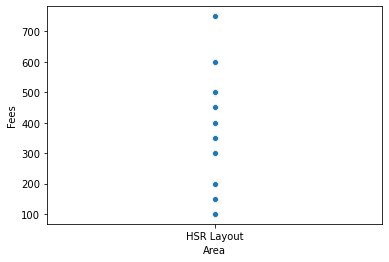

In [2217]:
Area_fields = data[data['Area'] == 'HSR Layout']

sns.scatterplot(x = Area_fields['Area'], y = Area_fields['Fees'])

The area field does not have any specific relation to the fees. The column has 867 distinct values, and that also is not evenly divided.

Hence we will drop this column as this wont allow our model to learn more.

In [2218]:
data.drop('Area', axis =1, inplace = True)

In [2219]:
data.sample(20)

,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,MD - General Medicine,Diploma in Otorhinolaryngology (DLO),MD - Homeopathy,Rating_value,City,Place_new
4417,28,99,"Rohini, Delhi",General Medicine,Type 1 Diabetes Treatment Diabetes Renal Failu...,700,1,0,0,0,0,0,0,0,0,0,"[99, ]",Delhi,"[Rohini, Delhi]"
4628,29,94,"HSR Layout, Bangalore",Dentist,Crowns and Bridges Fixing Teeth Removal and Re...,300,0,1,0,0,0,0,0,0,0,0,"[94, ]",Bangalore,"[HSR Layout, Bangalore]"
5613,12,82,"Malad West, Mumbai",Dermatologists,"82% 5 Feedback Malad West, Mumbai",500,1,0,0,0,1,0,0,0,0,0,"[82, ]",Mumbai,"[Malad West, Mumbai]"
182,15,NaN,"Chikkadpally, Hyderabad",Homeopath,NaN,600,0,0,0,1,0,0,0,0,0,0,NaN,Hyderabad,"[Chikkadpally, Hyderabad]"
5577,10,NaN,"Mehdipatnam, Hyderabad",Homeopath,NaN,200,0,0,0,1,0,0,0,0,0,0,NaN,Hyderabad,"[Mehdipatnam, Hyderabad]"
1910,0,NaN,"Mira Road, Mumbai",Ayurveda,NaN,50,0,0,1,0,0,0,0,0,0,0,NaN,Mumbai,"[Mira Road, Mumbai]"
1846,11,NaN,"Velachery, Chennai",Dermatologists,NaN,300,1,0,0,0,1,0,0,0,0,0,NaN,Chennai,"[Velachery, Chennai]"
1982,20,NaN,"Vijayanagar, Bangalore",Ayurveda,NaN,200,0,0,1,0,0,0,0,0,0,0,NaN,Bangalore,"[Vijayanagar, Bangalore]"
3497,21,NaN,"Kovilambakkam, Chennai",General Medicine,NaN,150,1,0,0,0,0,0,0,0,0,0,NaN,Chennai,"[Kovilambakkam, Chennai]"
638,5,NaN,"Rajouri Garden, Delhi",Dentist,"Rajouri Garden, Delhi ₹200 Visits Today",200,0,1,0,0,0,0,0,0,0,0,NaN,Delhi,"[Rajouri Garden, Delhi]"


In [2220]:
#Checking data in Miscellaneous column

data['Miscellaneous_Info']

0                    100% 16 Feedback Kakkanad, Ernakulam
1                   98% 76 Feedback Whitefield, Bangalore
2                                                     NaN
3       Bannerghatta Road, Bangalore ₹250 Available on...
4                   100% 4 Feedback Keelkattalai, Chennai
                              ...                        
5956              98% 45 Feedback Basavanagudi, Bangalore
5957                                                  NaN
5958        97% 11 Feedback Greater Kailash Part 2, Delhi
5959    General Medical Consultation Viral Fever Treat...
5960    Acrylic Partial Denture Crowns and Bridges Fix...
Name: Miscellaneous_Info, Length: 5961, dtype: object

In [2221]:
Misc_empty = data[data['Miscellaneous_Info'].isnull()==True]

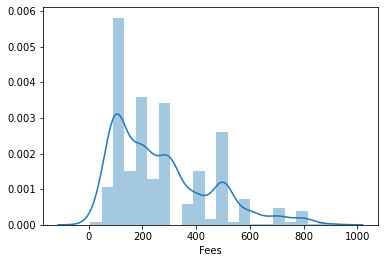

In [2222]:
sns.distplot(Misc_empty['Fees'])

The fees is spread between the lowest and highest range of fees where Miscellaneous info is not available.

Also the number of missing values in Miscellaneous column is 2620 (43%)
The values available also have information like rating, Place etc, which are also available with us in separate columns. Hence we will drop this column.

In [2223]:
data.drop('Miscellaneous_Info', axis =1, inplace = True)

Dropping all the extra columns from our dataframe.

We will drop -

- Place - Since we have City stored in a separate column
- Rating_value - Since we have already manipulated the Rating column
- Place_new - We already have the city in a separate column.

In [2224]:
data.drop(['Place', 'Rating_value', 'Place_new'], axis = 1, inplace = True)

In [2225]:
data

,Experience,Rating,Profile,Fees,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,MD - General Medicine,Diploma in Otorhinolaryngology (DLO),MD - Homeopathy,City
0,24,100,Homeopath,100,0,0,0,1,0,0,0,0,0,1,Ernakulam
1,12,98,Ayurveda,350,0,0,1,0,0,0,0,0,0,0,Bangalore
2,9,NaN,ENT Specialist,300,1,0,0,0,0,0,0,0,0,0,Bangalore
3,12,NaN,Ayurveda,250,0,0,1,0,0,0,0,0,0,0,Bangalore
4,20,100,Ayurveda,250,0,0,1,0,0,0,0,0,0,0,Chennai
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5956,19,98,ENT Specialist,300,1,0,0,0,0,1,0,0,0,0,Bangalore
5957,33,NaN,General Medicine,100,1,0,0,0,0,0,0,0,0,0,Chennai
5958,41,97,General Medicine,600,1,0,0,0,0,0,0,0,0,0,Delhi
5959,15,90,General Medicine,100,1,0,0,0,0,0,0,1,0,0,Mumbai


In [2226]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 15 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   Experience                            5961 non-null   object
 1   Rating                                2659 non-null   object
 2   Profile                               5961 non-null   object
 3   Fees                                  5961 non-null   int64 
 4   MBBS                                  5961 non-null   int64 
 5   BDS                                   5961 non-null   int64 
 6   BAMS                                  5961 non-null   int64 
 7   BHMS                                  5961 non-null   int64 
 8   MD - Dermatology                      5961 non-null   int64 
 9   MS - ENT                              5961 non-null   int64 
 10  Venereology & Leprosy                 5961 non-null   int64 
 11  MD - General Medicine         

In [2227]:
#Filling NaN values in Rating column

data.Rating.fillna('-99', inplace = True)

In [2228]:
#Filling NaN values in city column

data.City.fillna('Unknown', inplace = True)

In [2229]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 15 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   Experience                            5961 non-null   object
 1   Rating                                5961 non-null   object
 2   Profile                               5961 non-null   object
 3   Fees                                  5961 non-null   int64 
 4   MBBS                                  5961 non-null   int64 
 5   BDS                                   5961 non-null   int64 
 6   BAMS                                  5961 non-null   int64 
 7   BHMS                                  5961 non-null   int64 
 8   MD - Dermatology                      5961 non-null   int64 
 9   MS - ENT                              5961 non-null   int64 
 10  Venereology & Leprosy                 5961 non-null   int64 
 11  MD - General Medicine         

In [2230]:
data.sample(20)

,Experience,Rating,Profile,Fees,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,MD - General Medicine,Diploma in Otorhinolaryngology (DLO),MD - Homeopathy,City
1365,7,-99,Dentist,300,0,1,0,0,0,0,0,0,0,0,Mumbai
2985,25,98,Dentist,300,0,1,0,0,0,0,0,0,0,0,Hyderabad
1687,42,-99,General Medicine,300,1,0,0,0,0,0,0,0,0,0,Delhi
5948,15,-99,Ayurveda,100,0,0,1,0,0,0,0,0,0,0,Mumbai
3905,13,94,ENT Specialist,400,1,0,0,0,0,0,0,0,1,0,Hyderabad
4338,0,-99,Homeopath,100,0,0,0,1,0,0,0,0,0,0,Chennai
508,36,95,Dermatologists,100,1,0,0,0,1,0,0,0,0,0,Mumbai
1742,43,-99,Ayurveda,100,0,0,1,0,0,0,0,0,0,0,Mumbai
3571,8,85,Dentist,200,0,1,0,0,0,0,0,0,0,0,Hyderabad
5262,24,78,ENT Specialist,700,1,0,0,0,0,1,0,0,1,0,Mumbai


### We now proceed to plot the data that we have extracted as important.

In [2231]:
#Experience column is in object datatype. Converting it to integer type

data['Experience'] = data['Experience'].astype(int)

In [2232]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 15 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   Experience                            5961 non-null   int32 
 1   Rating                                5961 non-null   object
 2   Profile                               5961 non-null   object
 3   Fees                                  5961 non-null   int64 
 4   MBBS                                  5961 non-null   int64 
 5   BDS                                   5961 non-null   int64 
 6   BAMS                                  5961 non-null   int64 
 7   BHMS                                  5961 non-null   int64 
 8   MD - Dermatology                      5961 non-null   int64 
 9   MS - ENT                              5961 non-null   int64 
 10  Venereology & Leprosy                 5961 non-null   int64 
 11  MD - General Medicine         

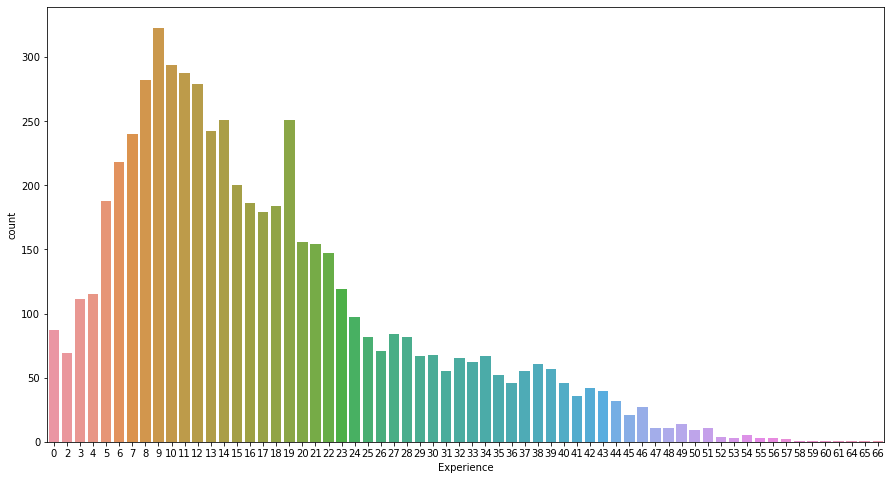

In [2233]:
plt.figure(figsize=(15,8))
sns.countplot(data['Experience'])

Observation -

The highest count of experience lies within the range 3 years to 23 years.
The count decreases as the number of experience years increases.

The fees does not increase as the experience increases.

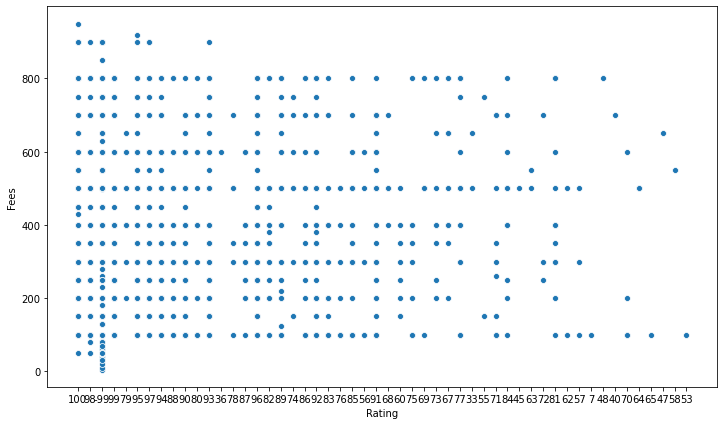

In [2234]:
#Comparing rating with Fees

plt.figure(figsize=(12,7))
sns.scatterplot(x = data['Rating'], y = data['Fees'])

In [2235]:
#Converting the rating into multiple bins

data['Rating'] = data['Rating'].astype(int)

bins = [-99,0,10,20,30,40,50,60,70,80,90,100]
labels = [i for i in range(11)]
data['Rating'] = pd.cut(data['Rating'], bins = bins, labels = labels, include_lowest = True)

In [2236]:
data

,Experience,Rating,Profile,Fees,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,MD - General Medicine,Diploma in Otorhinolaryngology (DLO),MD - Homeopathy,City
0,24,10,Homeopath,100,0,0,0,1,0,0,0,0,0,1,Ernakulam
1,12,10,Ayurveda,350,0,0,1,0,0,0,0,0,0,0,Bangalore
2,9,0,ENT Specialist,300,1,0,0,0,0,0,0,0,0,0,Bangalore
3,12,0,Ayurveda,250,0,0,1,0,0,0,0,0,0,0,Bangalore
4,20,10,Ayurveda,250,0,0,1,0,0,0,0,0,0,0,Chennai
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5956,19,10,ENT Specialist,300,1,0,0,0,0,1,0,0,0,0,Bangalore
5957,33,0,General Medicine,100,1,0,0,0,0,0,0,0,0,0,Chennai
5958,41,10,General Medicine,600,1,0,0,0,0,0,0,0,0,0,Delhi
5959,15,9,General Medicine,100,1,0,0,0,0,0,0,1,0,0,Mumbai


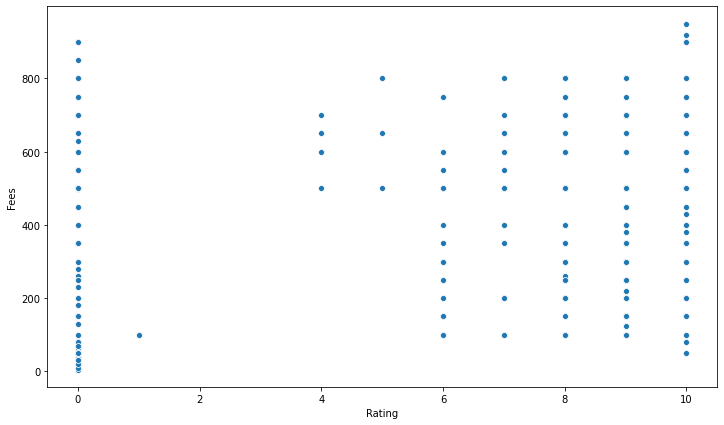

In [2237]:
#Checking fees and rating

plt.figure(figsize=(12,7))
sns.scatterplot(x = data['Rating'], y = data['Fees'])

Observation -

The rating fields encounters a steep increase in percentage after 88%.
The count for values below 88% rating are quite low.

Apart from this, the rating column has 2659 values present, and rest of the values are missing, which is around 58% of data.
We will replace the missing data with mean value of the profile rating, to maintain consistency in data.

We also observe that the highest paid doctors have a rating of 90 above.

Dentist             1397
General Medicine    1173
Dermatologists      1034
Homeopath            843
Ayurveda             786
ENT Specialist       728
Name: Profile, dtype: int64

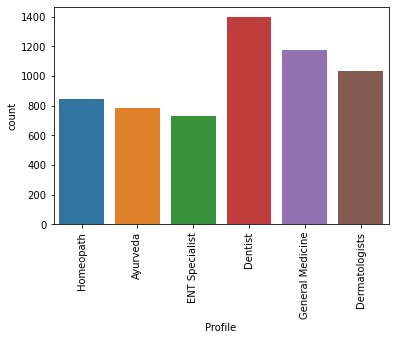

In [2238]:
#Exploring the Profile column

sns.countplot(data['Profile'])
plt.xticks(rotation=90)
data['Profile'].value_counts()

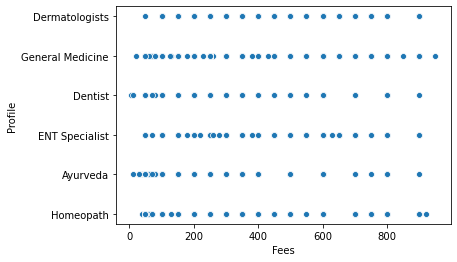

In [2239]:
#Comparing profile with Fees

sns.scatterplot(y = data['Profile'], x = data['Fees'])

In [2240]:
data['Profile'].value_counts()

Dentist             1397
General Medicine    1173
Dermatologists      1034
Homeopath            843
Ayurveda             786
ENT Specialist       728
Name: Profile, dtype: int64

Observation -

The dentists have the highest count (1397)
Followed by -
- General Medicine    1173
- Dermatologists      1034
- Homeopath            843
- Ayurveda             786
- ENT Specialist       728


No linear relation is found between Profile and Fees.

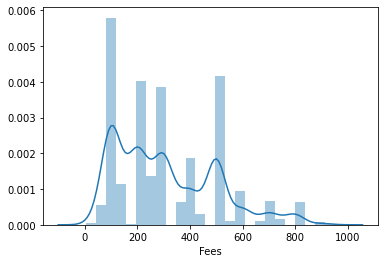

In [2241]:
#Exploring the Fees column

sns.distplot(data['Fees'])

Observation -

The data is right skewed.
Majority of the rows have fees within 0 - 200.
Count of rows with Fees as ~500 is also high.

 Bangalore             1258
 Mumbai                1219
 Delhi                 1184
 Hyderabad              951
 Chennai                855
 Coimbatore             228
 Ernakulam              153
 Thiruvananthapuram      86
Unknown                  25
e                         1
Dwarka                    1
Name: City, dtype: int64

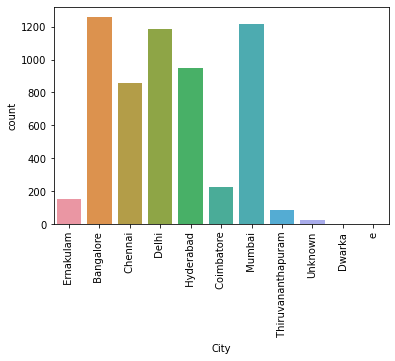

In [2242]:
#Exploring the City column

sns.countplot(data['City'])
plt.xticks(rotation=90)
data['City'].value_counts()

There is only 1 entry for Dwarka city and 1 for 'e'. We will drop these rows.

In [2243]:
data[data['City']=='Dwarka']

,Experience,Rating,Profile,Fees,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,MD - General Medicine,Diploma in Otorhinolaryngology (DLO),MD - Homeopathy,City
2169,11,0,Dentist,250,0,1,0,0,0,0,0,0,0,0,Dwarka


In [2244]:
data.drop(2169, axis = 0, inplace = True)

In [2245]:
data

,Experience,Rating,Profile,Fees,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,MD - General Medicine,Diploma in Otorhinolaryngology (DLO),MD - Homeopathy,City
0,24,10,Homeopath,100,0,0,0,1,0,0,0,0,0,1,Ernakulam
1,12,10,Ayurveda,350,0,0,1,0,0,0,0,0,0,0,Bangalore
2,9,0,ENT Specialist,300,1,0,0,0,0,0,0,0,0,0,Bangalore
3,12,0,Ayurveda,250,0,0,1,0,0,0,0,0,0,0,Bangalore
4,20,10,Ayurveda,250,0,0,1,0,0,0,0,0,0,0,Chennai
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5956,19,10,ENT Specialist,300,1,0,0,0,0,1,0,0,0,0,Bangalore
5957,33,0,General Medicine,100,1,0,0,0,0,0,0,0,0,0,Chennai
5958,41,10,General Medicine,600,1,0,0,0,0,0,0,0,0,0,Delhi
5959,15,9,General Medicine,100,1,0,0,0,0,0,0,1,0,0,Mumbai


In [2246]:
data[data['City']=='e']

,Experience,Rating,Profile,Fees,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,MD - General Medicine,Diploma in Otorhinolaryngology (DLO),MD - Homeopathy,City
3980,23,0,Dentist,250,0,1,0,0,0,0,0,0,0,0,e


In [2247]:
data.drop(3980, axis = 0, inplace = True)

In [2248]:
data

,Experience,Rating,Profile,Fees,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,MD - General Medicine,Diploma in Otorhinolaryngology (DLO),MD - Homeopathy,City
0,24,10,Homeopath,100,0,0,0,1,0,0,0,0,0,1,Ernakulam
1,12,10,Ayurveda,350,0,0,1,0,0,0,0,0,0,0,Bangalore
2,9,0,ENT Specialist,300,1,0,0,0,0,0,0,0,0,0,Bangalore
3,12,0,Ayurveda,250,0,0,1,0,0,0,0,0,0,0,Bangalore
4,20,10,Ayurveda,250,0,0,1,0,0,0,0,0,0,0,Chennai
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5956,19,10,ENT Specialist,300,1,0,0,0,0,1,0,0,0,0,Bangalore
5957,33,0,General Medicine,100,1,0,0,0,0,0,0,0,0,0,Chennai
5958,41,10,General Medicine,600,1,0,0,0,0,0,0,0,0,0,Delhi
5959,15,9,General Medicine,100,1,0,0,0,0,0,0,1,0,0,Mumbai


Final observation for City column -

We have 9 unique values in the city column.
Number of entries for Bangalore is the highest.

([0, 1, 2, 3, 4, 5, 6, 7, 8], <a list of 9 Text major ticklabel objects>)

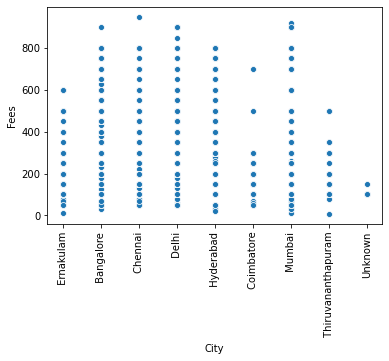

In [2249]:
#Checking relationship of cities with Fees

sns.scatterplot(x=data['City'], y=data['Fees'])
plt.xticks(rotation = 90)

Observation -

Fees in metrocities is observed to be higher than the rest.
In other cities, the price usually ranges under 600.

### Conclusion for the EDA -

- Metro cities have higher fees
- Higher number of qualifications have lesser experience.
- Rating column needs to be treated for missing values.
- Qualification count has an impact on fees


In [2250]:
data.describe()

,Experience,Fees,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,MD - General Medicine,Diploma in Otorhinolaryngology (DLO),MD - Homeopathy
count,5959.000000,5959.000000,5959.000000,5959.000000,5959.000000,5959.000000,5959.000000,5959.000000,5959.000000,5959.000000,5959.000000,5959.000000
mean,17.304078,307.964088,0.470717,0.228226,0.127874,0.125524,0.101527,0.068971,0.049169,0.047827,0.041786,0.030374
std,11.144124,190.949463,0.499184,0.419724,0.333977,0.331340,0.302051,0.253427,0.216240,0.213418,0.200116,0.171629
min,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.000000,150.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,14.000000,300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,23.000000,500.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,66.000000,950.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


From the above stats, we observe that -

- Majority of the doctors have experience below 23 years.
- 75% of the doctors have fees 500 and below.

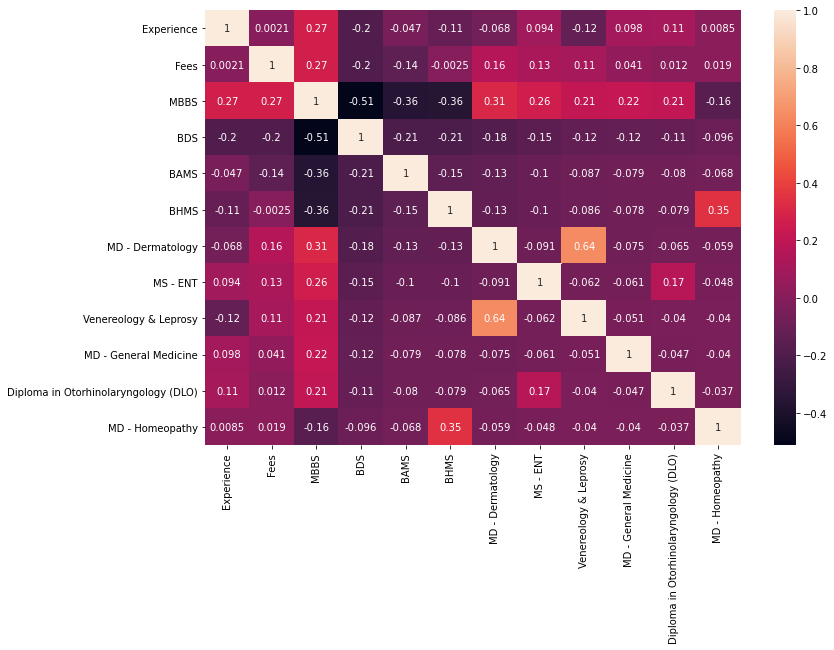

In [2251]:
#Plotting correlation heatmap

plt.figure(figsize=(12,8))
sns.heatmap(data.corr(), annot = True)

Observation

- The fees is maximum correlated with MBBS column (27%) and then with MD-Dermatology (16%)and MS-ENT (13%)
- There are multiple columns with negatie correlations - BDS (20%) and BAMS (-16%)
- Rest of the correlations are almost negligible.

### Outliers detection 

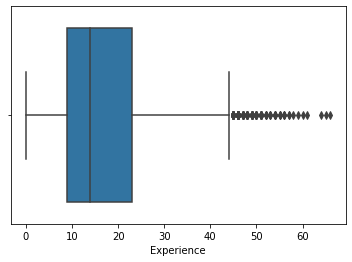

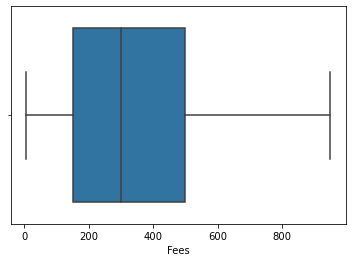

In [2252]:
integer_columns = ['Experience', 'Fees']

for i in integer_columns:
    sns.boxplot(data[i])
    plt.show()

We observe outliers in Experience column, but we will keep this values to consider the data where experience of the doctor is large.

### Skewness treatment

In [2253]:
data[integer_columns].skew()

Experience    0.991049
Fees          0.751483
dtype: float64

We will need to treat skewness for all Experience column.

We will not change Fees since it is our target variable.

We will use sqrt transform to check if we are able to remove skewness successfully.

In [2254]:
data['Experience'] = np.sqrt(data['Experience'])

In [2255]:
data[integer_columns].skew()

Experience    0.082645
Fees          0.751483
dtype: float64

We have successfully completed the skewness removal.

# Encoding the categorical data

In [2256]:
#We will replace the data using one hot encoding since we have values with no particular order

In [2257]:
data = pd.get_dummies(data, columns = ['City', 'Profile'], prefix = ['City', 'Profile'])

In [2258]:
data

,Experience,Rating,Fees,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,...,City_ Hyderabad,City_ Mumbai,City_ Thiruvananthapuram,City_Unknown,Profile_Ayurveda,Profile_Dentist,Profile_Dermatologists,Profile_ENT Specialist,Profile_General Medicine,Profile_Homeopath
0,4.898979,10,100,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,3.464102,10,350,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,3.000000,0,300,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,3.464102,0,250,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,4.472136,10,250,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5956,4.358899,10,300,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
5957,5.744563,0,100,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5958,6.403124,10,600,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5959,3.872983,9,100,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0


# Scaling the data

In [2259]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [2260]:
#Dividing the dataset into independent and dependent data before scaling

ds_x = data.drop('Fees', axis = 'columns')
y = data['Fees']

In [2261]:
ds_x

,Experience,Rating,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,MD - General Medicine,...,City_ Hyderabad,City_ Mumbai,City_ Thiruvananthapuram,City_Unknown,Profile_Ayurveda,Profile_Dentist,Profile_Dermatologists,Profile_ENT Specialist,Profile_General Medicine,Profile_Homeopath
0,4.898979,10,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,3.464102,10,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,3.000000,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,3.464102,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,4.472136,10,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5956,4.358899,10,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
5957,5.744563,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5958,6.403124,10,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5959,3.872983,9,1,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,1,0


In [2262]:
y

0       100
1       350
2       300
3       250
4       250
       ... 
5956    300
5957    100
5958    600
5959    100
5960    200
Name: Fees, Length: 5959, dtype: int64

In [2263]:
dataset = sc.fit_transform(ds_x)

x = pd.DataFrame(dataset,columns=ds_x.columns)

In [2264]:
x

,Experience,Rating,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,MD - General Medicine,...,City_ Hyderabad,City_ Mumbai,City_ Thiruvananthapuram,City_Unknown,Profile_Ayurveda,Profile_Dentist,Profile_Dermatologists,Profile_ENT Specialist,Profile_General Medicine,Profile_Homeopath
0,0.712593,1.162367,-0.943052,-0.543798,-0.382914,2.639428,-0.336154,-0.272178,-0.227403,-0.224119,...,-0.435771,-0.507122,-0.121009,-0.064908,-0.389798,-0.552859,-0.458202,-0.373055,-0.495065,2.463494
1,-0.345357,1.162367,-0.943052,-0.543798,2.611553,-0.378870,-0.336154,-0.272178,-0.227403,-0.224119,...,-0.435771,-0.507122,-0.121009,-0.064908,2.565429,-0.552859,-0.458202,-0.373055,-0.495065,-0.405928
2,-0.687543,-0.893231,1.060387,-0.543798,-0.382914,-0.378870,-0.336154,-0.272178,-0.227403,-0.224119,...,-0.435771,-0.507122,-0.121009,-0.064908,-0.389798,-0.552859,-0.458202,2.680567,-0.495065,-0.405928
3,-0.345357,-0.893231,-0.943052,-0.543798,2.611553,-0.378870,-0.336154,-0.272178,-0.227403,-0.224119,...,-0.435771,-0.507122,-0.121009,-0.064908,2.565429,-0.552859,-0.458202,-0.373055,-0.495065,-0.405928
4,0.397877,1.162367,-0.943052,-0.543798,2.611553,-0.378870,-0.336154,-0.272178,-0.227403,-0.224119,...,-0.435771,-0.507122,-0.121009,-0.064908,2.565429,-0.552859,-0.458202,-0.373055,-0.495065,-0.405928
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5954,0.314386,1.162367,1.060387,-0.543798,-0.382914,-0.378870,-0.336154,3.674069,-0.227403,-0.224119,...,-0.435771,-0.507122,-0.121009,-0.064908,-0.389798,-0.552859,-0.458202,2.680567,-0.495065,-0.405928
5955,1.336050,-0.893231,1.060387,-0.543798,-0.382914,-0.378870,-0.336154,-0.272178,-0.227403,-0.224119,...,-0.435771,-0.507122,-0.121009,-0.064908,-0.389798,-0.552859,-0.458202,-0.373055,2.019935,-0.405928
5956,1.821613,1.162367,1.060387,-0.543798,-0.382914,-0.378870,-0.336154,-0.272178,-0.227403,-0.224119,...,-0.435771,-0.507122,-0.121009,-0.064908,-0.389798,-0.552859,-0.458202,-0.373055,2.019935,-0.405928
5957,-0.043884,0.956807,1.060387,-0.543798,-0.382914,-0.378870,-0.336154,-0.272178,-0.227403,4.461925,...,-0.435771,1.971911,-0.121009,-0.064908,-0.389798,-0.552859,-0.458202,-0.373055,2.019935,-0.405928


# Fitting the Regression models

In [2265]:
#Importing the ML models

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


In [2266]:
#Creating objects for the data models

dt = DecisionTreeRegressor()
svr = SVR()
knn = KNeighborsRegressor()
lr = LinearRegression()

In [2267]:
#Finding best random state, fitting models and checking for regression metrics
test_score_list = []

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 41)
for i in [dt, svr, knn, lr]:
    i.fit(x_train, y_train)
    pred = (i.predict(x_test))
    test_score = r2_score(y_test, pred)
    test_score_list.append(test_score)
    train_score = r2_score(y_train,i.predict(x_train))
    if abs(train_score - test_score) <= 0.09:
        print(i)
        print('R2 score is ',r2_score(y_test, pred))
        print('R2 for train data', r2_score(y_train,i.predict(x_train)))
        print('Mean absolute error is ',mean_absolute_error(y_test, pred))
        print('Mean squared error is ', mean_squared_error(y_test, pred))
        print('Root mean squared error is ',(mean_squared_error(y_test, pred, squared=False)))
        print('------------------------------------------')

SVR()
R2 score is  0.10192512624030581
R2 for train data 0.08466451616130821
Mean absolute error is  141.85403456708548
Mean squared error is  33033.48773029647
Root mean squared error is  181.75116981823382
------------------------------------------
LinearRegression()
R2 score is  0.1947065987733111
R2 for train data 0.17349313802009492
Mean absolute error is  135.75510259842488
Mean squared error is  29620.74818700314
Root mean squared error is  172.10679297169864
------------------------------------------


In [2268]:
max(test_score_list)

0.1947065987733111

Observation -

The best scores that we receive using this model are 19%. CHecking for bagging and boosting models to check if they perform any better.

# Ensemble methods

In [2269]:
#Importing the random forest regressor

from sklearn.ensemble import RandomForestRegressor

In [2270]:
rfr = RandomForestRegressor()

In [2271]:
#Finding the best random state, fitting the data and predicting scores

test_score_list = []

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 41)
rfr.fit(x_train, y_train)
pred = rfr.predict(x_test)
test_score = r2_score(y_test, pred)
test_score_list.append(test_score)
train_score = r2_score(y_train,rfr.predict(x_train))
if abs(train_score - test_score) <= 1:
    print('R2 score for test data is ',r2_score(y_test, pred))
    print('R2 for train data', r2_score(y_train,rfr.predict(x_train)))
    print('Mean absolute error is ',mean_absolute_error(y_test, pred))
    print('Mean squared error is ', mean_squared_error(y_test, pred))
    print('Root mean squared error is ',(mean_squared_error(y_test, pred, squared=False)))
    print('------------------------------------------')

R2 score for test data is  0.02011278435016295
R2 for train data 0.6734944905579857
Mean absolute error is  145.22523160081812
Mean squared error is  36042.75463106269
Root mean squared error is  189.84929452347905
------------------------------------------


In [2272]:
max(test_score_list)

0.02011278435016295

In [2273]:
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor

In [2274]:
ad = AdaBoostRegressor()
gd = GradientBoostingRegressor()

In [2275]:
#Finding the best random state, fitting the data and predicting scores on Adaboost regressor

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 41)
ad.fit(x_train, y_train)
pred = ad.predict(x_test)
test_score = r2_score(y_test, pred)
test_score_list.append(test_score)
train_score = r2_score(y_train,ad.predict(x_train))
if abs(train_score - test_score) <= 0.2:
    print('R2 score for test data is ',r2_score(y_test, pred))
    print('R2 for train data', r2_score(y_train,ad.predict(x_train)))
    print('Mean absolute error is ',mean_absolute_error(y_test, pred))
    print('Mean squared error is ', mean_squared_error(y_test, pred))
    print('Root mean squared error is ',(mean_squared_error(y_test, pred, squared=False)))
    print('------------------------------------------')

R2 score for test data is  0.12678248825444471
R2 for train data 0.1261392228589
Mean absolute error is  148.1384755128977
Mean squared error is  32119.170464449755
Root mean squared error is  179.2182202356941
------------------------------------------


In [2276]:
max(test_score_list)

0.12678248825444471

In [2277]:
#Finding the best random state, fitting the data and predicting scores on GradientBoostRegressor

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 41)
gd.fit(x_train, y_train)
pred = gd.predict(x_test)
test_score = r2_score(y_test, pred)
test_score_list.append(test_score)
train_score = r2_score(y_train,gd.predict(x_train))
if abs(train_score - test_score) <= 1:
    print('R2 score for test data is ',r2_score(y_test, pred))
    print('R2 for train data', r2_score(y_train,gd.predict(x_train)))
    print('Mean absolute error is ',mean_absolute_error(y_test, pred))
    print('Mean squared error is ', mean_squared_error(y_test, pred))
    print('Root mean squared error is ',(mean_squared_error(y_test, pred, squared=False)))
    print('------------------------------------------')

R2 score for test data is  0.2172217181331012
R2 for train data 0.2336993282284413
Mean absolute error is  133.2314422352634
Mean squared error is  28792.58458856714
Root mean squared error is  169.68377821278952
------------------------------------------


In [2278]:
max(test_score_list)

0.2172217181331012

Observation


We observe that we receive 21 % accuracy on Gradient Boosting Regressor, hence we proceed with the gradient boosting as our final model. But before that, we check cross val scores and Regularization methods scores as well

# Cross validation 

In [2279]:
from sklearn.model_selection import cross_val_score

In [2280]:
for i in [dt, svr, knn, lr, rfr, ad, gd]:
    cv = cross_val_score(i, x, y, cv=5, scoring = 'r2')
    print(i, cv.mean())

DecisionTreeRegressor() -0.373926367859711
SVR() 0.0911980983256876
KNeighborsRegressor() 0.040202635279649734
LinearRegression() 0.16261012692757676
RandomForestRegressor() 0.004222114922908915
AdaBoostRegressor() 0.12009331285433766
GradientBoostingRegressor() 0.1945203615522893


Observation -

The best score is received at GradientBoosting in case of cross validation as well.

# Regularization methods

In [2281]:
#Importing models

from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

ls = Lasso(alpha = 0.0001)
rd = Ridge(alpha = 0.0001)

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 41)

In [2282]:
#Fitting the model

ls.fit(x_train, y_train)

Lasso(alpha=0.0001)

In [2283]:
#Prediction

t = ls.predict(x_test)

In [2284]:
#Scoring

print('Test data',r2_score(y_test, t))
print('Test data',r2_score(y_train, ls.predict(x_train)))


Test data 0.1956855988525158
Test data 0.1740027057006176


In [2285]:
#Fitting in ridge

rd.fit(x_train, y_train)

Ridge(alpha=0.0001)

In [2286]:
#Prediction

r = rd.predict(x_test)

In [2287]:
#Scoring

print('Test data',r2_score(y_test, r))
print('Test data',r2_score(y_train, rd.predict(x_train)))

Test data 0.19568546080086113
Test data 0.1740027057250222


In [2288]:
#Elastic net model

from sklearn.linear_model import ElasticNet

In [2289]:
el = ElasticNet(alpha = 0.0001)

In [2290]:
#Fitting the model

el.fit(x_train, y_train)

ElasticNet(alpha=0.0001)

In [2291]:
#Prediction and scoring

p = el.predict(x_test)
print('Test data',r2_score(y_test, p))
print('Test data',r2_score(y_train, el.predict(x_train)))

Test data 0.19568441332366937
Test data 0.17400270507581805


In [2292]:
#Cross validation of regularization models

for i in [ls, rd, el]:
    cv = cross_val_score(i, x, y, cv=5, scoring = 'r2')
    print(i, cv.mean())

Lasso(alpha=0.0001) 0.1736558024300953
Ridge(alpha=0.0001) 0.17365559924354765
ElasticNet(alpha=0.0001) 0.17365702564436442


Observation -

Since the scores are still lesser than Gradient boost, we proceed with Gradient boosting regressor as our final model, on random state 41

# Hypertuning the Gradient Boost regressor

In [2293]:
from sklearn.model_selection import GridSearchCV

In [2294]:
gd.get_params()

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'ls',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'presort': 'deprecated',
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [2295]:
params = {'learning_rate': [0.1,0.01],'max_depth': [3,4,5], 'min_samples_leaf': [1,2], 'min_samples_split': [2,3], 'n_estimators': [10,50,100], 'alpha':[0.9,0.1,0.01]}

In [2296]:
gcv = GridSearchCV(gd,params)

In [2297]:
res = gcv.fit(x_train,y_train)

In [2298]:
res.best_params_

{'alpha': 0.9,
 'learning_rate': 0.1,
 'max_depth': 3,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

In [2299]:
res.best_score_

0.17660677504291156

List of best params -

{'alpha': 0.9,
 'learning_rate': 0.1,
 'max_depth': 3,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

# Saving model with best params



In [2300]:
gd_final = GradientBoostingRegressor(learning_rate=0.1, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100)

In [2301]:
gd_final.fit(x_train, y_train)

GradientBoostingRegressor()

In [2302]:
pred = gd_final.predict(x_test)

In [2303]:
print(r2_score(y_test, pred))

0.2171775691685469


In [2304]:
print('Mean absolute error is ',mean_absolute_error(y_test, pred))
print('Mean squared error is ', mean_squared_error(y_test, pred))
print('Root mean squared error is ',(mean_squared_error(y_test, pred, squared=False)))

Mean absolute error is  133.23416917038224
Mean squared error is  28794.208500249253
Root mean squared error is  169.6885632570718


Observation -

The parameters which were identified as the best using grid search were the default parameters.

We have successfully saved the model which gave us the best results.




# Saving model using Joblib

In [2305]:
import joblib

In [2306]:
joblib.dump(gd_final,'doctor_fee.obj')

['doctor_fee.obj']

# Predicting for test data

In [2307]:
test = pd.read_excel('Final_Test.xlsx', sheet_name='Sheet1')

In [2308]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Qualification       1987 non-null   object
 1   Experience          1987 non-null   object
 2   Rating              897 non-null    object
 3   Place               1981 non-null   object
 4   Profile             1987 non-null   object
 5   Miscellaneous_Info  1153 non-null   object
dtypes: object(6)
memory usage: 93.3+ KB


In [2309]:
test

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,MBBS,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai"
3,BAMS,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...
...,...,...,...,...,...,...
1982,"BAMS, Doctor of Medicine",10 years experience,NaN,"Basavanagudi, Bangalore",Ayurveda,NaN
1983,"MD - Dermatology , Venereology & Leprosy, MBBS",4 years experience,NaN,"Choolai, Chennai",Dermatologists,NaN
1984,"MBBS, MD / MS - Obstetrics & Gynaecology",9 years experience,NaN,"Porur, Chennai",General Medicine,NaN
1985,BDS,12 years experience,98%,"Arekere, Bangalore",Dentist,RCT - Root Canal Treatment Root Canal Treatmen...


In [2310]:
# treating the Qualifications column

test['Qualification'] = test.Qualification.str.split(',')

for heading in final_qualifications:
    test[heading] = 0
    
for x,y in zip(test['Qualification'].values, np.array([idx for idx in range(len(test))])):
    for n in x:
        n = n.strip()
        if n in final_qualifications:
            test[n][y] = 1

In [2311]:
test

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,MD - General Medicine,Diploma in Otorhinolaryngology (DLO),MD - Homeopathy
0,[MBBS],35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN,1,0,0,0,0,0,0,0,0,0
1,"[MBBS, Diploma in Otorhinolaryngology (DLO)]",31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN,1,0,0,0,0,0,0,0,1,0
2,"[MBBS, DDVL]",40 years experience,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai",1,0,0,0,0,0,0,0,0,0
3,[BAMS],0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN,0,0,1,0,0,0,0,0,0,0
4,"[BDS, MDS - Conservative Dentistry & Endodont...",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1982,"[BAMS, Doctor of Medicine]",10 years experience,NaN,"Basavanagudi, Bangalore",Ayurveda,NaN,0,0,1,0,0,0,0,0,0,0
1983,"[MD - Dermatology , Venereology & Leprosy, M...",4 years experience,NaN,"Choolai, Chennai",Dermatologists,NaN,1,0,0,0,1,0,1,0,0,0
1984,"[MBBS, MD / MS - Obstetrics & Gynaecology]",9 years experience,NaN,"Porur, Chennai",General Medicine,NaN,1,0,0,0,0,0,0,0,0,0
1985,[BDS],12 years experience,98%,"Arekere, Bangalore",Dentist,RCT - Root Canal Treatment Root Canal Treatmen...,0,1,0,0,0,0,0,0,0,0


In [2312]:
test.drop('Qualification', axis = 1, inplace = True)

In [2313]:
#Extracting the years of experience from 'Experience column'

test['Experience_years'] = test.Experience.str.split(' ')

In [2314]:
for i in range(len(test.Experience)):
    test['Experience'][i] = test['Experience_years'][i][0]

In [2315]:

test.drop('Experience_years', axis = 1, inplace = True)

In [2316]:
test['Experience'] = test['Experience'].astype(int)

In [2317]:

#Removing % sign from Rating column -

test['Rating_value'] = test.Rating.str.split('%')

In [2318]:

for i in range(len(test.Rating)):
    if test['Rating_value'][i] is not np.NaN:
        test['Rating'][i] = test['Rating_value'][i][0]

In [2319]:
#Filling NaN values in Rating column

test.Rating.fillna('-99', inplace = True)

In [2320]:
#Converting the rating into multiple bins

test['Rating'] = test['Rating'].astype(int)

bins = [-99,0,10,20,30,40,50,60,70,80,90,100]
labels = [i for i in range(11)]
test['Rating'] = pd.cut(test['Rating'], bins = bins, labels = labels, include_lowest = True)

In [2321]:
#Treating Place column

test['Area'] = np.NaN
test['City'] = np.NaN


test['Place_new'] = test.Place.str.split(',')


for i in range(len(test)):
    if test['Place_new'][i] is not np.NaN:
        if len(test['Place_new'][i]) == 2:
            test['Area'][i] = test['Place_new'][i][0]
            test['City'][i] = test['Place_new'][i][1]
        else:
            test['City'][i] = test['Place_new'][i][0]

test.drop('Area', axis =1, inplace = True)

#Filling NaN values in city column

test.City.fillna('Unknown', inplace = True)

In [2322]:
#Dropping misc info column

test.drop('Miscellaneous_Info', axis =1, inplace = True)

In [2323]:
test.drop(['Rating_value','Place_new', 'Place'], axis = 1, inplace = True)

In [2324]:
test

,Experience,Rating,Profile,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,MD - General Medicine,Diploma in Otorhinolaryngology (DLO),MD - Homeopathy,City
0,35,0,General Medicine,1,0,0,0,0,0,0,0,0,0,Mumbai
1,31,0,ENT Specialist,1,0,0,0,0,0,0,0,1,0,Hyderabad
2,40,7,Dermatologists,1,0,0,0,0,0,0,0,0,0,Chennai
3,0,0,Ayurveda,0,0,1,0,0,0,0,0,0,0,Delhi
4,16,10,Dentist,0,1,0,0,0,0,0,0,0,0,Bangalore
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1982,10,0,Ayurveda,0,0,1,0,0,0,0,0,0,0,Bangalore
1983,4,0,Dermatologists,1,0,0,0,1,0,1,0,0,0,Chennai
1984,9,0,General Medicine,1,0,0,0,0,0,0,0,0,0,Chennai
1985,12,10,Dentist,0,1,0,0,0,0,0,0,0,0,Bangalore


In [2325]:
#Removing skewness from Experience column

test['Experience'] = np.sqrt(test['Experience'])

In [2326]:
test

,Experience,Rating,Profile,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,MD - General Medicine,Diploma in Otorhinolaryngology (DLO),MD - Homeopathy,City
0,5.916080,0,General Medicine,1,0,0,0,0,0,0,0,0,0,Mumbai
1,5.567764,0,ENT Specialist,1,0,0,0,0,0,0,0,1,0,Hyderabad
2,6.324555,7,Dermatologists,1,0,0,0,0,0,0,0,0,0,Chennai
3,0.000000,0,Ayurveda,0,0,1,0,0,0,0,0,0,0,Delhi
4,4.000000,10,Dentist,0,1,0,0,0,0,0,0,0,0,Bangalore
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1982,3.162278,0,Ayurveda,0,0,1,0,0,0,0,0,0,0,Bangalore
1983,2.000000,0,Dermatologists,1,0,0,0,1,0,1,0,0,0,Chennai
1984,3.000000,0,General Medicine,1,0,0,0,0,0,0,0,0,0,Chennai
1985,3.464102,10,Dentist,0,1,0,0,0,0,0,0,0,0,Bangalore


In [2327]:
# Encoding categorical data

test = pd.get_dummies(test, columns = ['City', 'Profile'], prefix = ['City', 'Profile'])

In [2328]:
test

,Experience,Rating,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,MD - General Medicine,...,City_ Hyderabad,City_ Mumbai,City_ Thiruvananthapuram,City_Unknown,Profile_Ayurveda,Profile_Dentist,Profile_Dermatologists,Profile_ENT Specialist,Profile_General Medicine,Profile_Homeopath
0,5.916080,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,5.567764,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
2,6.324555,7,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0.000000,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,4.000000,10,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1982,3.162278,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1983,2.000000,0,1,0,0,0,1,0,1,0,...,0,0,0,0,0,0,1,0,0,0
1984,3.000000,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1985,3.464102,10,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [2329]:
#Scaling test data

test_data = sc.fit_transform(test)

In [2330]:
final_test = pd.DataFrame(test_data,columns=test.columns)

In [2331]:
final_test

,Experience,Rating,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,MD - General Medicine,...,City_ Hyderabad,City_ Mumbai,City_ Thiruvananthapuram,City_Unknown,Profile_Ayurveda,Profile_Dentist,Profile_Dermatologists,Profile_ENT Specialist,Profile_General Medicine,Profile_Homeopath
0,1.400561,-0.903081,1.014703,-0.523961,-0.373276,-0.377638,-0.329874,-0.262401,-0.217815,-0.22899,...,-0.448698,2.026813,-0.092895,-0.055034,-0.380244,-0.534090,-0.453546,-0.366241,1.864196,-0.402478
1,1.145893,-0.903081,1.014703,-0.523961,-0.373276,-0.377638,-0.329874,-0.262401,-0.217815,-0.22899,...,2.228669,-0.493386,-0.092895,-0.055034,-0.380244,-0.534090,-0.453546,2.730443,-0.536424,-0.402478
2,1.699216,0.535745,1.014703,-0.523961,-0.373276,-0.377638,-0.329874,-0.262401,-0.217815,-0.22899,...,-0.448698,-0.493386,-0.092895,-0.055034,-0.380244,-0.534090,2.204849,-0.366241,-0.536424,-0.402478
3,-2.924942,-0.903081,-0.985510,-0.523961,2.678984,-0.377638,-0.329874,-0.262401,-0.217815,-0.22899,...,-0.448698,-0.493386,-0.092895,-0.055034,2.629893,-0.534090,-0.453546,-0.366241,-0.536424,-0.402478
4,-0.000368,1.152385,-0.985510,1.908540,-0.373276,-0.377638,-0.329874,-0.262401,-0.217815,-0.22899,...,-0.448698,-0.493386,-0.092895,-0.055034,-0.380244,1.872343,-0.453546,-0.366241,-0.536424,-0.402478
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1982,-0.612863,-0.903081,-0.985510,-0.523961,2.678984,-0.377638,-0.329874,-0.262401,-0.217815,-0.22899,...,-0.448698,-0.493386,-0.092895,-0.055034,2.629893,-0.534090,-0.453546,-0.366241,-0.536424,-0.402478
1983,-1.462655,-0.903081,1.014703,-0.523961,-0.373276,-0.377638,3.031459,-0.262401,4.591054,-0.22899,...,-0.448698,-0.493386,-0.092895,-0.055034,-0.380244,-0.534090,2.204849,-0.366241,-0.536424,-0.402478
1984,-0.731511,-0.903081,1.014703,-0.523961,-0.373276,-0.377638,-0.329874,-0.262401,-0.217815,-0.22899,...,-0.448698,-0.493386,-0.092895,-0.055034,-0.380244,-0.534090,-0.453546,-0.366241,1.864196,-0.402478
1985,-0.392187,1.152385,-0.985510,1.908540,-0.373276,-0.377638,-0.329874,-0.262401,-0.217815,-0.22899,...,-0.448698,-0.493386,-0.092895,-0.055034,-0.380244,1.872343,-0.453546,-0.366241,-0.536424,-0.402478


In [2332]:
model = joblib.load('doctor_fee.obj')

In [2333]:
result = model.predict(final_test)

In [2334]:
predicted_values = pd.DataFrame({'Predicted':result})

In [2335]:
predicted_values

,Predicted
0,286.209401
1,302.405236
2,297.437316
3,227.896542
4,266.861049
...,...
1982,228.741063
1983,353.312978
1984,308.760415
1985,240.045875


# Conclusion

We have successfully created a model to predict the fee of a doctor.
The model is giving an accuracy of 21% only, symbolizing that the data is not enough for the model to actually learn well.
The mean absolute error is around 130 and root mean squared error is around 169.

The features used as independent data have a wide range of fee spread among them, and the correlations of fee with the independent variables is quite low.

The model should be fed with more data which actually impacts the fee in a specific manner, to allow our model to learn better.